<a href="https://colab.research.google.com/github/ftkovr9k/MAGIC-gamma-hadron-classifier/blob/main/MAGIC_gamma_hadron_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

Dataset: https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope

Adding Columns and converting Gamma & Hadron classes to numeric values.

In [2]:
#Create columns
cols = ["fLength",
"fWidth",
"fSize",
"fConc",
"fConc1",
"fAsym",
"fM3Long",
"fM3Trans",
"fAlpha",
"fDist",
"class"]

#Add Column name

#Read from Google Drive
df = pd.read_csv('/content/drive/MyDrive/Magic Gamma-Hadron data set/magic04.data', names=cols)

#Read from temporary space in Colab
#df = pd.read_csv("magic04.data", names=cols)

#Convert classes to numeric
df["class"] = (df["class"] == "g").astype(int)

#Remove rows with missing values
df.dropna(inplace=True)

#Remove duplicates
df.drop_duplicates(inplace=True)

df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


Drawing Histograms to visualize

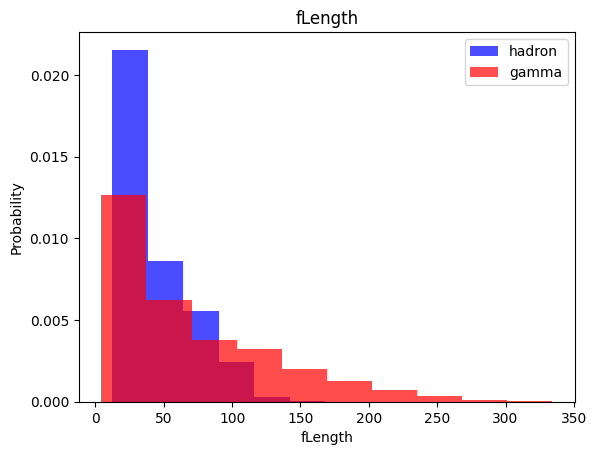

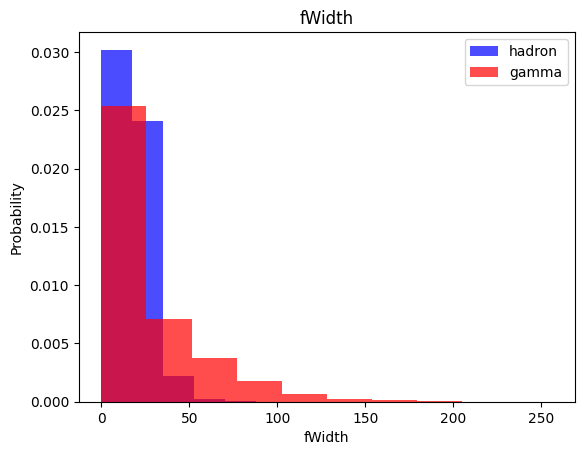

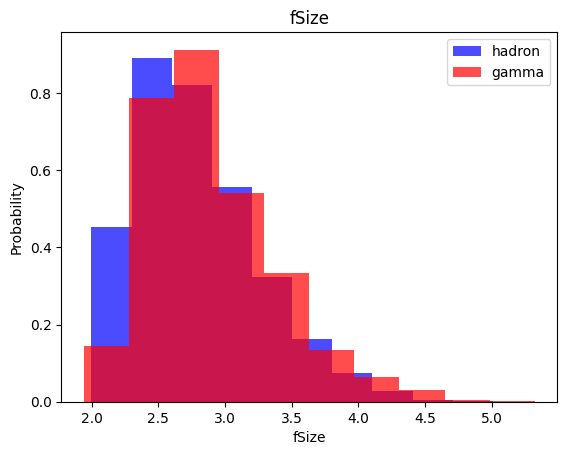

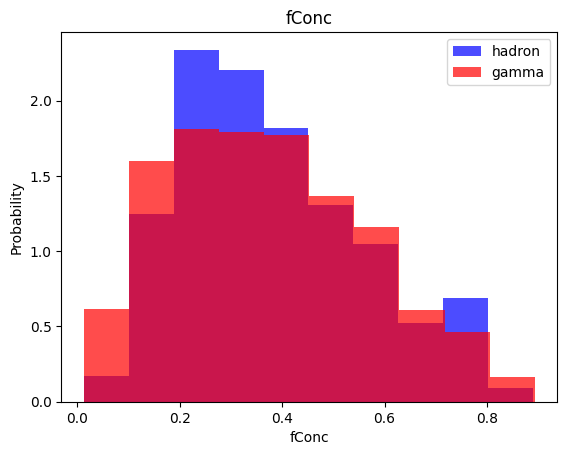

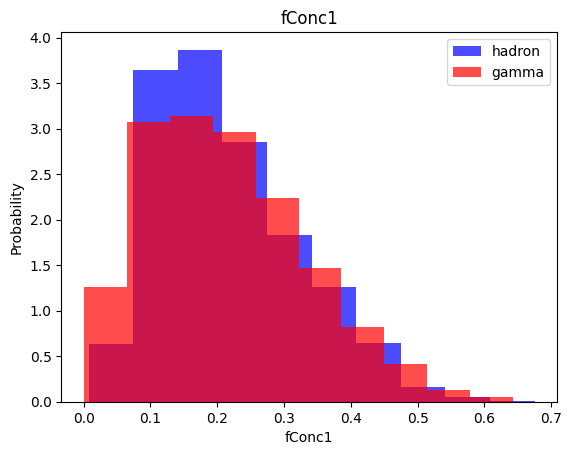

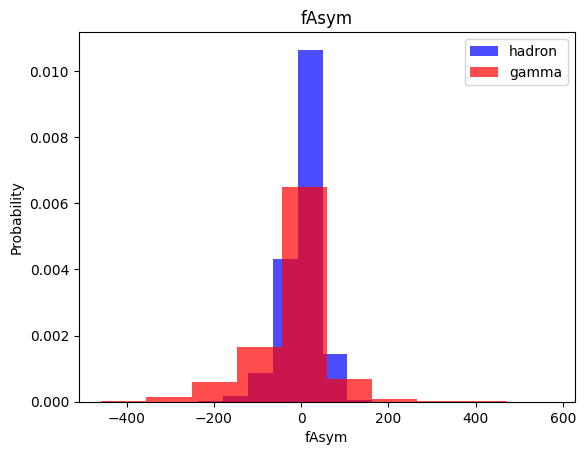

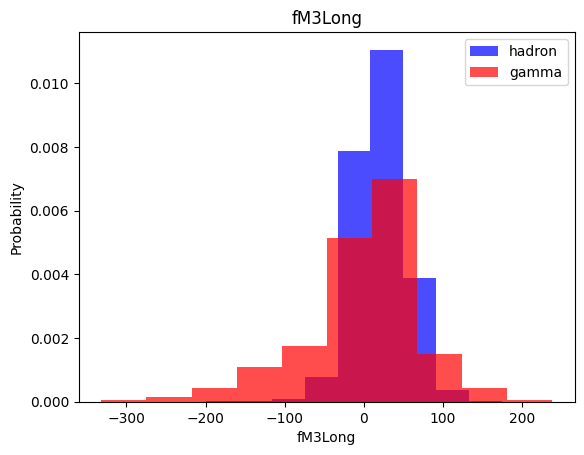

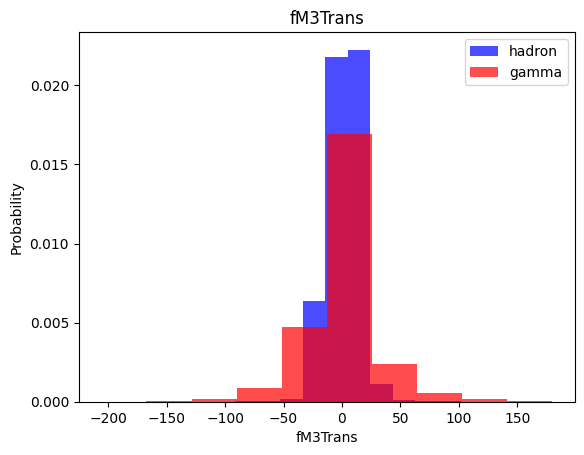

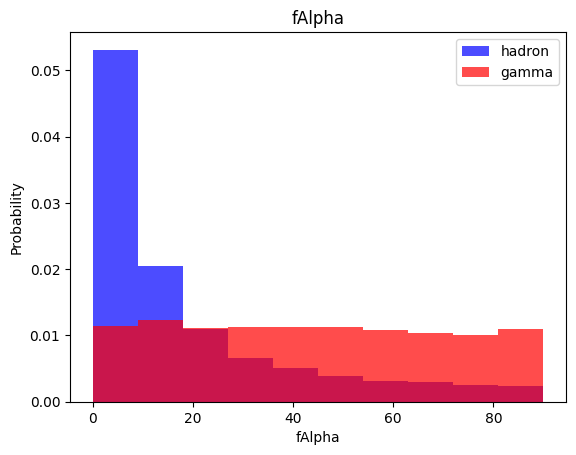

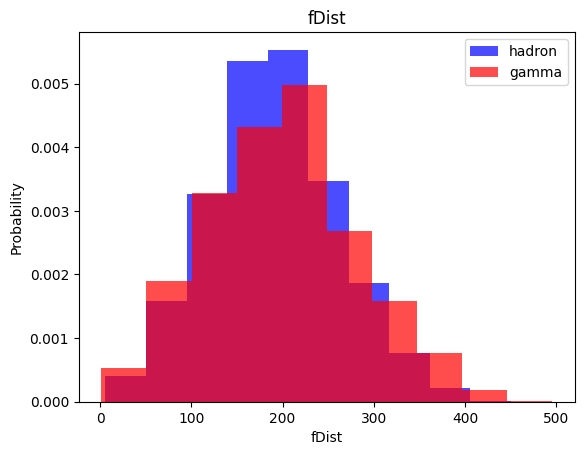

In [3]:
for label in cols[:-1]:
  plt.hist(df[df['class'] == 1][label], color='blue', label="hadron", alpha=0.7, density=True)
  plt.hist(df[df['class'] == 0][label], color='red', label="gamma", alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

Split data set into Train, Validation and Test

In [4]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


Scale of data is currently way off. Create a function to scale

In [5]:
def scale_data(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y


There is a huge gap in the train data set between hadron and gamma

In [6]:
print(len(train[train["class"] == 1])) #gamma
print(len(train[train["class"] == 0])) #hadron

7379
3964


Increase the number of hadron. There is a overample parameter in the scale_data() function.

In [7]:
train, X_train, y_train =  scale_data(train, oversample=True)
valid, X_valid, y_valid =  scale_data(valid, oversample=False)
test, X_test, y_test =  scale_data(test, oversample=False)

Visualize again

In [8]:
print(sum(y_train == 1)) #gamma
print(sum(y_train == 0)) #hadron


7379
7379


Preprocessing is complete. Run different models.

k-Nearest Neighbors

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [16]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.75      0.73      0.74      1324
           1       0.86      0.87      0.86      2457

    accuracy                           0.82      3781
   macro avg       0.80      0.80      0.80      3781
weighted avg       0.82      0.82      0.82      3781



Naive Bayes